In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Archive:  /content/drive/MyDrive/Humana-Mays-Datasets/Training_final.zip
  inflating: Training_final/Additional Features.csv  
  inflating: Training_final/Control Point.csv  
  inflating: Training_final/Cost & Utilization.csv  
  inflating: Training_final/Demographics.csv  
  inflating: Training_final/humana_mays_target_member_conditions.csv  
  inflating: Training_final/humana_mays_target_member_details.csv  
  inflating: Training_final/humana_mays_target_member_visit_claims.csv  
  inflating: Training_final/humana_mays_target_members.csv  
  inflating: Training_final/MEMBER_DATA.csv  
  inflating: Training_final/Pharmacy Utilization.csv  
  inflating: Training_final/QUALITY_DATA.csv  
  inflating: Training_final/Sales Channel.csv  
  inflating: Training_final/Social Determinants of Health.csv  
  inflating: Training_final/Web Activity.csv  


In [ ]:
import pandas as pd

# Define file paths
target_members_path = "/content/Training_final/humana_mays_target_members.csv"
demographics_path = "/content/Training_final/Demographics.csv"
social_determinants_path = "/content/Training_final/Social Determinants of Health.csv"
web_activity_path = "/content/Training_final/Web Activity.csv"
member_data_path = "/content/Training_final/MEMBER_DATA.csv"
# quality_data_path = "/content/Training_final/QUALITY_DATA.csv"
member_details_path = "/content/Training_final/humana_mays_target_member_details.csv"
member_claim_path = "/content/drive/My Drive/Humana-Mays-Datasets/humana_mays_target_member_visit_claims.csv"
member_condition_path = "/content/Training_final/humana_mays_target_member_conditions.csv"
additional_features_path = "/content/Training_final/Additional Features.csv"
control_point_path = "/content/Training_final/Control Point.csv"
cost_utilization_path = "/content/Training_final/Cost & Utilization.csv"
pharmacy_utilization_path = "/content/Training_final/Pharmacy Utilization.csv"
sales_channel_path = "/content/Training_final/Sales Channel.csv"
merged_data_path = "/content/drive/MyDrive/Humana-Mays-Datasets/Train_merged_data2.csv"
merged_data_path1= "/content/drive/MyDrive/Humana-Mays-Datasets/Train_merged_data3.csv"
merged_data_path2 = "/content/drive/MyDrive/Humana-Mays-Datasets/Train_merged_data4.csv"
train_path="/content/drive/MyDrive/Humana-Mays-Datasets/training_df_2.csv"
test_path="/content/drive/MyDrive/Humana-Mays-Datasets/testing_df_2.csv"
# # Read CSV files into DataFrames
# target_members_df = pd.read_csv(target_members_path)
# demographics_df = pd.read_csv(demographics_path)
# social_determinants_df = pd.read_csv(social_determinants_path)
# web_activity_df = pd.read_csv(web_activity_path)
# member_data_df = pd.read_csv(member_data_path)
# member_details_df = pd.read_csv(member_details_path)
# merged_df=pd.read_csv(merged_data_path)
# merged_df1=pd.read_csv(merged_data_path1)
# merged_df2=pd.read_csv(merged_data_path2)
# quality_data_df = pd.read_csv(quality_data_path)
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)
# member_claim_df= pd.read_csv(member_claim_path)
# # member_condition_df = pd.read_csv(member_condition_path)
# additional_features_df = pd.read_csv(additional_features_path)
# # control_point_df = pd.read_csv(control_point_path)
# cost_utilization_df = pd.read_csv(cost_utilization_path)
# pharmacy_utilization_df = pd.read_csv(pharmacy_utilization_path)
# sales_channel_df = pd.read_csv(sales_channel_path)
# first_chunk = next(member_claim_df)



In [ ]:


# Finding columns that are present in the train dataset but missing in the test dataset
missing_columns_in_test = set(train_df.columns) - set(test_df.columns)
missing_columns_in_test


{'preventive_visit_gap_ind_x', 'preventive_visit_gap_ind_y'}

In [ ]:

# Function to summarize the dataset
def summarize_data(df):
    summary = pd.DataFrame({
        'Column': df.columns,
        'Non-Null Count': df.notnull().sum(),
        'Missing Count': df.isnull().sum(),
        'Unique Count': df.nunique(),
        'Data Type': df.dtypes
    })

    # Calculating additional statistics for numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary['Mean'] = df[numeric_cols].mean()
    summary['Median'] = df[numeric_cols].median()
    summary['Min'] = df[numeric_cols].min()
    summary['Max'] = df[numeric_cols].max()

    return summary


In [ ]:
training_data = train_df

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define features (X) and target (y)
X = training_data.drop(['preventive_visit_gap_ind_x', 'preventive_visit_gap_ind_y', 'id'], axis=1)  # Features
y = training_data['preventive_visit_gap_ind_x']  # Target variable

# Step 2: Initialize StratifiedKFold with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 3: Lists to store accuracy and classification reports for each fold
accuracies = []
reports = []

# Step 4: Perform 3-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Step 5: Train a Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred = rf.predict(X_test)

    # Step 7: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    report = classification_report(y_test, y_pred, output_dict=True)
    reports.append(report)

    print(f'Fold Accuracy: {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))

# Step 8: Display average results across all folds
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy over 3 folds: {average_accuracy * 100:.2f}%')

# Optional: Display a summary of average precision, recall, and F1-score for each class across the folds
# This is an advanced step and will require aggregating the reports across the folds if needed.


Fold Accuracy: 68.03%
              precision    recall  f1-score   support

           0       0.67      0.81      0.74    280282
           1       0.69      0.52      0.59    229020

    accuracy                           0.68    509302
   macro avg       0.68      0.67      0.67    509302
weighted avg       0.68      0.68      0.67    509302

Fold Accuracy: 68.01%
              precision    recall  f1-score   support

           0       0.67      0.81      0.74    280281
           1       0.69      0.52      0.59    229020

    accuracy                           0.68    509301
   macro avg       0.68      0.67      0.66    509301
weighted avg       0.68      0.68      0.67    509301

Fold Accuracy: 67.96%
              precision    recall  f1-score   support

           0       0.67      0.81      0.74    280281
           1       0.69      0.52      0.59    229020

    accuracy                           0.68    509301
   macro avg       0.68      0.66      0.66    509301
weighted

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define features (X) and target (y)
X = training_data.drop(['preventive_visit_gap_ind_x','preventive_visit_gap_ind_y','id'], axis=1)  # Features
y = training_data['preventive_visit_gap_ind_x']  # Target variable

# Step 2: Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 6: Classification report (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 68.17%
              precision    recall  f1-score   support

           0       0.67      0.81      0.74    167777
           1       0.70      0.52      0.60    137804

    accuracy                           0.68    305581
   macro avg       0.69      0.67      0.67    305581
weighted avg       0.68      0.68      0.67    305581



In [ ]:
# Calculating the AUC score for the Random Forest model

from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
auc_score


0.7409415660605745

Top 10 important features:
                        feature  importance
52     total_net_paid_pmpm_cost    0.023633
53      total_allowed_pmpm_cost    0.020010
94  cnt_cp_webstatement_pmpm_ct    0.018921
62            rx_tier_1_pmpm_ct    0.016137
54          days_since_last_clm    0.015694
..                          ...         ...
91  channel_Partner Call Center    0.001383
51                    lis_ind_Y    0.001330
33              riskarr_rewards    0.001138
49          dual_eligible_ind_Y    0.001073
92        channel_DMS Telesales    0.001040

[150 rows x 2 columns]


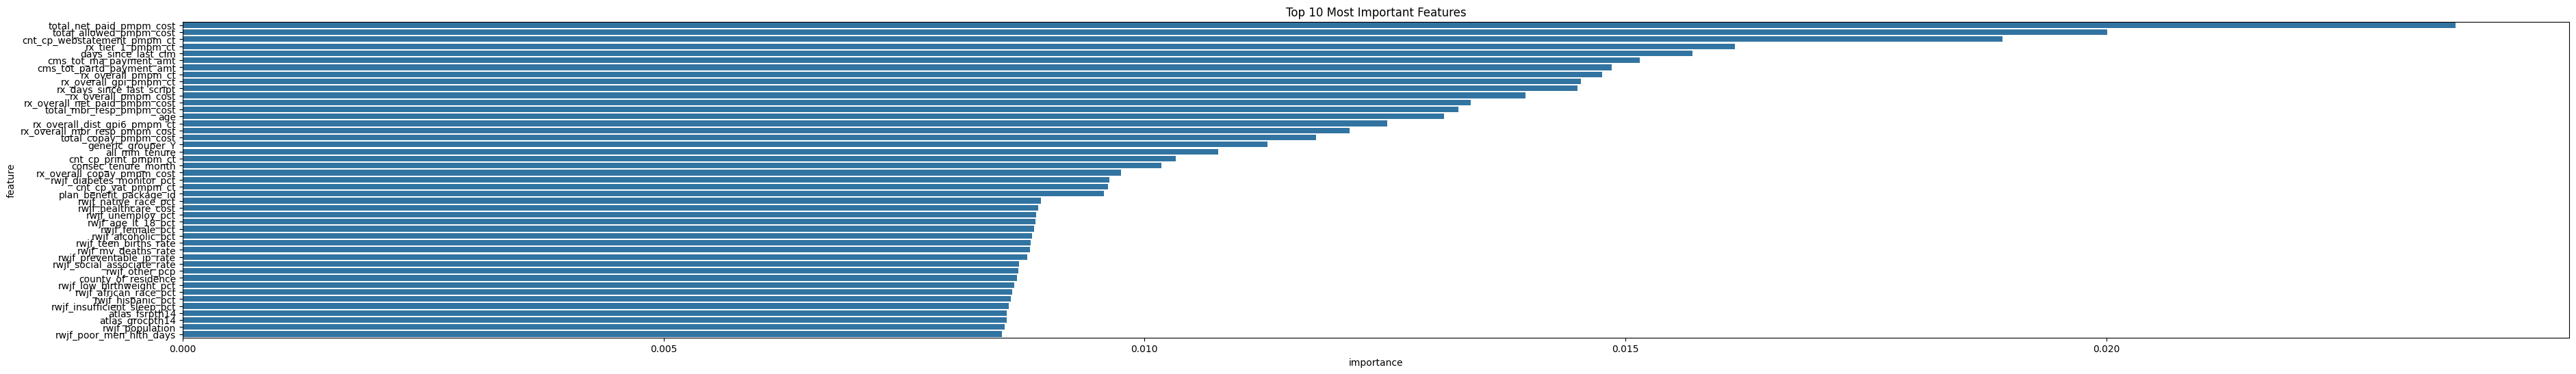

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 4: Get feature importance scores
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display the top features
print("Top 10 important features:")
print(feature_importances.head(150))

# Visualizing feature importance
plt.figure(figsize=(45, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(45))
plt.title('Top 10 Most Important Features')
plt.show()

# # Optional: If you want to select the top N most important features (for example, 10 features)
# top_n = 30  # You can change this value
# important_features = feature_importances['feature'].head(top_n).values
# X_train_selected = X_train[important_features]
# X_test_selected = X_test[important_features]

# # Step 5: Retrain the model using the selected top features
# rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_selected.fit(X_train_selected, y_train)

# # Step 6: Make predictions and evaluate the model with the selected features
# y_pred_selected = rf_selected.predict(X_test_selected)

# # Step 7: Evaluate the model with selected features
# accuracy_selected = accuracy_score(y_test, y_pred_selected)
# print(f'Accuracy with selected features: {accuracy_selected * 100:.2f}%')

# # Step 8: Classification report with selected features (precision, recall, f1-score)
# report_selected = classification_report(y_test, y_pred_selected)
# print(report_selected)

Top 10 important features:
                         feature  importance
52      total_net_paid_pmpm_cost    0.023633
53       total_allowed_pmpm_cost    0.020010
94   cnt_cp_webstatement_pmpm_ct    0.018921
62             rx_tier_1_pmpm_ct    0.016137
54           days_since_last_clm    0.015694
..                           ...         ...
121              cnt_cp_emails_2    0.004615
36                 login_pmpm_ct    0.004598
151            optometrist_visit    0.004583
129              cnt_cp_emails_3    0.004214
45                 veteran_ind_Y    0.004085

[100 rows x 2 columns]


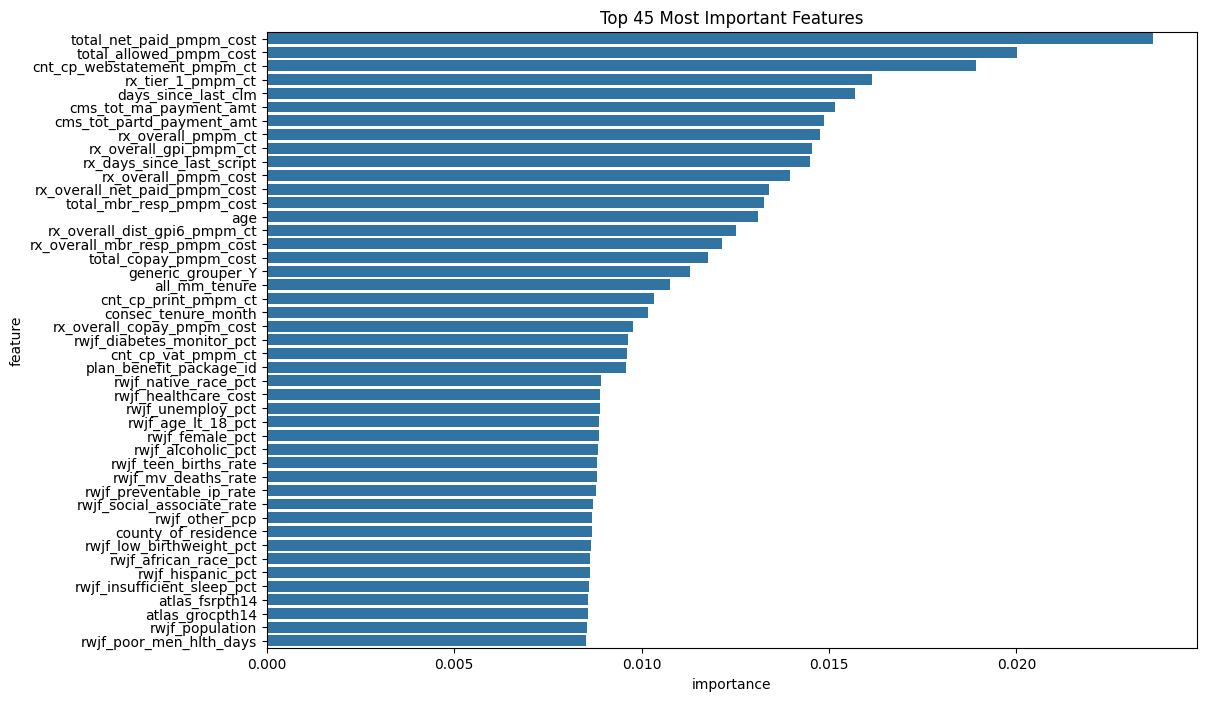

In [ ]:
# Displaying the feature importances in a scrollable format

import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importances DataFrame is already created
# If not, please replace with the appropriate code to generate it

# Create the HTML string to display feature importances in a scrollable format
html_str = '<div style="max-height: 300px; overflow-y: scroll;">' + ''.join(
    f'<p>{row["feature"]}: {row["importance"]:.6f}</p>' for _, row in feature_importances.iterrows()
) + '</div>'
display(HTML(html_str))
# Display the top features
print("Top 10 important features:")
print(feature_importances.head(100))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(45))
plt.title('Top 45 Most Important Features')
plt.show()


total_net_paid_pmpm_cost: 0.023633

total_allowed_pmpm_cost: 0.020010

cnt_cp_webstatement_pmpm_ct: 0.018921

rx_tier_1_pmpm_ct: 0.016137

days_since_last_clm: 0.015694

cms_tot_ma_payment_amt: 0.015149

cms_tot_partd_payment_amt: 0.014855

rx_overall_pmpm_ct: 0.014755

rx_overall_gpi_pmpm_ct: 0.014534

rx_days_since_last_script: 0.014504

rx_overall_pmpm_cost: 0.013959

rx_overall_net_paid_pmpm_cost: 0.013393

total_mbr_resp_pmpm_cost: 0.013265

age: 0.013116

rx_overall_dist_gpi6_pmpm_ct: 0.012526

rx_overall_mbr_resp_pmpm_cost: 0.012132

total_copay_pmpm_cost: 0.011781

generic_grouper_Y: 0.011280

all_mm_tenure: 0.010768

cnt_cp_print_pmpm_ct: 0.010322

consec_tenure_month: 0.010173

rx_overall_copay_pmpm_cost: 0.009758

rwjf_diabetes_monitor_pct: 0.009634

cnt_cp_vat_pmpm_ct: 0.009618

plan_benefit_package_id: 0.009577

rwjf_native_race_pct: 0.008927

rwjf_healthcare_cost: 0.008895

rwjf_unemploy_pct: 0.008875

rwjf_age_lt_18_pct: 0.008863

rwjf_female_pct: 0.008850

rwjf_alcoholic_pct: 0.008833

rwjf_teen_births_rate: 0.008814

rwjf_mv_deaths_rate: 0.008810

rwjf_preventable_ip_rate: 0.008780

rwjf_social_associate_rate: 0.008695

rwjf_other_pcp: 0.008687

county_of_residence: 0.008672

rwjf_low_birthweight_pct: 0.008643

rwjf_african_race_pct: 0.008627

rwjf_hispanic_pct: 0.008612

rwjf_insufficient_sleep_pct: 0.008590

atlas_fsrpth14: 0.008568

atlas_grocpth14: 0.008567

rwjf_population: 0.008546

rwjf_poor_men_hlth_days: 0.008516

rwjf_long_commute_alone_pct: 0.008512

atlas_ffrpth14: 0.008361

rwjf_mammography_pct: 0.008195

atlas_povertyallagespct: 0.008157

fci_score: 0.007978

rwjf_disconnect_youth_pct: 0.007885

atlas_recfacpth14: 0.007856

rwjf_air_pollute_density: 0.007852

cnt_cp_webstatement_0: 0.007729

rx_tier_2_pmpm_ct: 0.007663

rwjf_flu_vax: 0.007574

cnt_cp_webstatement_1: 0.007553

nonpar_ds_clm: 0.007547

rx_pharmacies_pmpm_ct: 0.007501

cnt_cp_webstatement_7: 0.007498

oontwk_ds_clm: 0.007464

cnt_cp_emails_pmpm_ct: 0.007331

cnt_cp_webstatement_2: 0.007320

rx_tier_3_pmpm_ct: 0.007043

cnt_cp_webstatement_8: 0.007022

cnt_cp_webstatement_6: 0.006970

cnt_cp_webstatement_5: 0.006913

cnt_cp_webstatement_4: 0.006899

cci_score: 0.006890

oontwk_allowed_pmpm_cost: 0.006841

cnt_cp_webstatement_3: 0.006809

nonpar_allowed_pmpm_cost: 0.006768

oontwk_net_paid_pmpm_cost: 0.006688

nonpar_net_paid_pmpm_cost: 0.006674

cnt_cp_webstatement_9: 0.006670

cnt_cp_webstatement_10: 0.006591

total_coins_pmpm_cost: 0.006589

riskarr_downside: 0.006451

cnt_cp_webstatement_11: 0.006275

unattributed_provider_Y: 0.006111

cardiologist_visit: 0.005817

radiologist_visit: 0.005649

er_visit: 0.005527

tenure_band: 0.005447

days_since_last_login: 0.005272

ophthalmologist_visit: 0.005258

rx_tier_4_pmpm_ct: 0.005112

dcsi_score: 0.005072

rx_overall_deduct_pmpm_cost: 0.005055

oontwk_clm_ct_pmpm: 0.004954

nonpar_clm_ct_pmpm: 0.004911

oontwk_mbr_resp_pmpm_cost: 0.004872

riskarr_upside: 0.004840

nonpar_mbr_resp_pmpm_cost: 0.004798

cnt_cp_print_2: 0.004763

cnt_cp_emails_2: 0.004615

login_pmpm_ct: 0.004598

optometrist_visit: 0.004583

cnt_cp_emails_3: 0.004214

veteran_ind_Y: 0.004085

rx_overall_coins_pmpm_cost: 0.004068

cnt_cp_emails_0: 0.004018

cnt_cp_emails_1: 0.003924

orthopedist_visit: 0.003812

cnt_cp_vat_6: 0.003725

cnt_cp_emails_10: 0.003724

cnt_cp_vat_1: 0.003658

cnt_cp_vat_2: 0.003654

cnt_cp_vat_7: 0.003581

cnt_cp_vat_0: 0.003550

cnt_cp_print_1: 0.003523

cnt_cp_vat_9: 0.003352

cnt_cp_vat_8: 0.003332

cnt_cp_print_3: 0.003297

cnt_cp_vat_11: 0.003193

cnt_cp_print_0: 0.003192

cnt_cp_vat_3: 0.003190

gastroenterologist_visit: 0.003186

oontwk_coins_pmpm_cost: 0.003097

nonpar_coins_pmpm_cost: 0.003080

cnt_cp_vat_10: 0.003041

preventative_visit: 0.002923

sex_cd_M: 0.002847

total_deduct_pmpm_cost: 0.002792

urgent_care_visit: 0.002725

oontwk_copay_pmpm_cost: 0.002689

nonpar_copay_pmpm_cost: 0.002676

obgyn_visit: 0.002588

podiatrist_visit: 0.002401

disabled_ind_Y: 0.002382

riskarr_global: 0.002176

pulmonologist_visit: 0.002175

login_count_11: 0.001881

login_count_9: 0.001745

oncolologist_visit: 0.001733

login_count_0: 0.001707

login_count_8: 0.001702

physical_therapist_visit: 0.001675

nephroloogist_visit: 0.001674

login_count_10: 0.001608

channel_Field: 0.001571

endocrinologist_visit: 0.001561

login_count_7: 0.001548

total_ip_acute_admit_days_pmpm: 0.001532

channel_Consumer Direct: 0.001512

channel_Partner Call Center: 0.001383

lis_ind_Y: 0.001330

riskarr_rewards: 0.001138

dual_eligible_ind_Y: 0.001073

channel_DMS Telesales: 0.001040

In [ ]:
import pandas as pd

# Define the file path and chunk size
member_claim_path = "/content/drive/My Drive/Humana-Mays-Datasets/humana_mays_target_member_visit_claims.csv"
chunk_size = 100000  # Adjust based on your requirements

# List of columns to check for unique values
columns_to_check = [
    'dos_year'
]

# Initialize a set for each column to collect unique values
unique_values_dict = {col: set() for col in columns_to_check}

# Read the CSV file in chunks
for chunk in pd.read_csv(member_claim_path, chunksize=chunk_size):
    # Iterate over each column and update the set of unique values
    for col in columns_to_check:
        if col in chunk.columns:
            unique_values_dict[col].update(chunk[col].dropna().unique())

    # Break after processing the first 100,000 rows
    break

# Print the unique values for each column
for col, unique_values in unique_values_dict.items():
    print(f"Unique values for {col}: {unique_values}")


Unique values for dos_year: {2021, 2022}


<ipython-input-24-fbcbb3e8edde>:16: DtypeWarning: Columns (4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(member_claim_path, chunksize=chunk_size):


In [ ]:
import pandas as pd

# Define the file path and chunk size
member_claim_path = "/content/drive/My Drive/Humana-Mays-Datasets/humana_mays_target_member_visit_claims.csv"
chunk_size = 10000  # Adjust based on your memory constraints

# Initialize an empty DataFrame to store the final aggregated results
final_aggregated_df = pd.DataFrame()

# Iterate through each chunk of the file
for chunk in pd.read_csv(member_claim_path, chunksize=chunk_size):
    # Filter the chunk to include only rows where dos_year is 2023

    # Drop unnecessary columns
    chunk = chunk.drop(columns=['serv_date_skey', 'clm_unique_key','dos_year',])

    # Convert 'Y' to 1 and empty values to 0 in the columns to be aggregated
    columns_to_aggregate = [col for col in chunk.columns if col not in ['id']]
    chunk[columns_to_aggregate] = chunk[columns_to_aggregate].applymap(lambda x: 1 if x == 'Y' else 0)

    # Aggregate the chunk by 'id' and 'dos_year'
    aggregated_chunk = chunk.groupby(['id'])[columns_to_aggregate].sum().reset_index()

    # Merge the aggregated chunk into the final DataFrame
    if final_aggregated_df.empty:
        final_aggregated_df = aggregated_chunk
    else:
        # Concatenate the new chunk with the final DataFrame and re-aggregate
        final_aggregated_df = pd.concat([final_aggregated_df, aggregated_chunk])
        final_aggregated_df = final_aggregated_df.groupby(['id'])[columns_to_aggregate].sum().reset_index()

# Display the first few rows of the final aggregated DataFrame for dos_year 2023
final_aggregated_df.head()


<ipython-input-26-5366f453bb5d>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chunk[columns_to_aggregate] = chunk[columns_to_aggregate].applymap(lambda x: 1 if x == 'Y' else 0)
<ipython-input-26-5366f453bb5d>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chunk[columns_to_aggregate] = chunk[columns_to_aggregate].applymap(lambda x: 1 if x == 'Y' else 0)
<ipython-input-26-5366f453bb5d>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chunk[columns_to_aggregate] = chunk[columns_to_aggregate].applymap(lambda x: 1 if x == 'Y' else 0)
<ipython-input-26-5366f453bb5d>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chunk[columns_to_aggregate] = chunk[columns_to_aggregate].applymap(lambda x: 1 if x == 'Y' else 0)
<ipython-input-26-5366f453bb5d>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chun

,id,pcp_visit,annual_wellness,humana_paf,preventative_visit,comp_physical_exam,ihwa,fqhc_visit,telehealth,endocrinologist_visit,...,optometrist_visit,physical_therapist_visit,cardiologist_visit,gastroenterologist_visit,orthopedist_visit,obgyn_visit,nephroloogist_visit,pulmonologist_visit,urgent_care_visit,er_visit
0,1,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,4,0,5,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,1
3,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,3,0,0,2,0
4,6,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: sorft member claim df based on id ascending
import pandas as pd

file_path = member_claim_path
chunk_size = 10000  # Adjust this size depending on your memory availability

# Create an iterator to read the file in sorted chunks
chunk_iterator = pd.read_csv(file_path, chunksize=chunk_size)

# Sort each chunk as it's read in and write them to separate files
sorted_chunks = []
for i, chunk in enumerate(chunk_iterator):
    # Sort each chunk by 'column_name'
    chunk_sorted = chunk.sort_values(by='id')

    # Save the sorted chunk to a temporary CSV file
    temp_file_path = f'sorted_chunk_{i}.csv'
    chunk_sorted.to_csv(temp_file_path, index=False)

    # Keep track of sorted chunk files
    sorted_chunks.append(temp_file_path)

# Merge the sorted chunks using the sorted file paths
sorted_df = pd.concat([pd.read_csv(chunk) for chunk in sorted_chunks]).sort_values(by='id')




In [ ]:
file_path = '/content/drive/My Drive/Humana-Mays-Datasets/training_df_1.csv'

# Save the DataFrame with the selected important features
training_data.to_csv(file_path, index=False)

print(f'File saved to {file_path}')

File saved to /content/drive/My Drive/Humana-Mays-Datasets/training_df_1.csv


In [ ]:
member_claim_df.head()

NameError: name 'member_claim_df' is not defined